In [39]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)

In [56]:
df_read = pd.read_excel('Europe Hotel Booking Satisfaction Score.xlsx')

In [57]:
df = df_read.copy()

In [6]:
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [7]:
df.tail()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
103899,94171,Female,23,business,Group Travel,Individual/Couple,2,1,2,3,2,2,2,2,3,2,neutral or dissatisfied
103900,73097,Male,49,tourism,Group Travel,Group bookings,4,4,4,4,2,5,5,5,5,4,satisfied
103901,68825,Male,30,tourism,Group Travel,Group bookings,1,1,1,3,4,5,4,5,5,4,neutral or dissatisfied
103902,54173,Female,22,business,Group Travel,Individual/Couple,1,1,1,5,1,1,1,5,4,1,neutral or dissatisfied
103903,62567,Male,27,academic,Group Travel,Group bookings,1,3,3,3,1,1,1,4,3,1,neutral or dissatisfied


In [8]:
df.shape

(103904, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

In [10]:
df.columns

Index(['id', 'Gender', 'Age', 'purpose_of_travel', 'Type of Travel',
       'Type Of Booking', 'Hotel wifi service',
       'Departure/Arrival  convenience', 'Ease of Online booking',
       'Hotel location', 'Food and drink', 'Stay comfort',
       'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [11]:
df[['Hotel wifi service',
       'Departure/Arrival  convenience', 'Ease of Online booking',
       'Hotel location', 'Food and drink', 'Stay comfort',
       'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness', 'satisfaction']]

,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,2,2,2,2,5,5,5,4,4,5,satisfied
3,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,3,3,3,3,4,5,3,3,3,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,2,neutral or dissatisfied
103900,4,4,4,4,2,5,5,5,5,4,satisfied
103901,1,1,1,3,4,5,4,5,5,4,neutral or dissatisfied
103902,1,1,1,5,1,1,1,5,4,1,neutral or dissatisfied


In [12]:
secili_kolonlar=['Hotel wifi service', 'Departure/Arrival  convenience', 'Ease of Online booking', 'Hotel location', 'Food and drink', 'Stay comfort','Common Room entertainment', 'Checkin/Checkout service','Other service', 'Cleanliness', 'satisfaction']

In [58]:
df['Hotel wifi service'].value_counts()

3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Hotel wifi service, dtype: int64

In [59]:
df['Cleanliness'].value_counts()

4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: Cleanliness, dtype: int64

<AxesSubplot:xlabel='Cleanliness', ylabel='Count'>

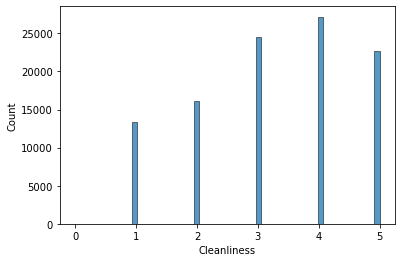

In [16]:
sns.histplot(df['Cleanliness'])

In [17]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64

###  *Her bir sütundaki benzersiz etiketlerin sayısını ve kendilerini yazdıralım.

In [64]:
print("Her sütundaki benzersiz etiket sayısı")
print("===" * 16)
for x in df.columns:
    print(f"{x} sütunu için {len(df[x].unique())} farklı etiket:")
    print(df[x].unique())
    print(df[x].nunique())
    print()

Her sütundaki benzersiz etiket sayısı
id sütunu için 103904 farklı etiket:
[ 70172   5047 110028 ...  68825  54173  62567]
103904

Gender sütunu için 2 farklı etiket:
['Male' 'Female']
2

Age sütunu için 75 farklı etiket:
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
75

purpose_of_travel sütunu için 5 farklı etiket:
['aviation' 'tourism' 'business' 'academic' 'personal']
5

Type of Travel sütunu için 2 farklı etiket:
['Personal Travel' 'Group Travel']
2

Type Of Booking sütunu için 3 farklı etiket:
['Not defined' 'Group bookings' 'Individual/Couple']
3

Hotel wifi service sütunu için 6 farklı etiket:
[3 2 4 1 5 0]
6

Departure/Arrival  convenience sütunu için 6 farklı etiket:
[4 2 5 3 1 0]
6

Ease of Online booking sütunu için 6 farklı etiket:
[3 2 5 4 1 0]
6

Hotel location sütunu için 6 farklı etiket:


#### *"Type Of Booking" sütununda "Not defined" olarak belirtilmiş veriler varsa kontrol edelim

In [19]:
df['Type Of Booking'].value_counts()


Group bookings       49665
Individual/Couple    46745
Not defined           7494
Name: Type Of Booking, dtype: int64

In [20]:
df['Type Of Booking'].value_counts(normalize=True)

Group bookings       0.477989
Individual/Couple    0.449886
Not defined          0.072124
Name: Type Of Booking, dtype: float64

##### *Görüldüğü üzere 7494 adet Not defined veri var ve %7  oranında(veri yüzdesi düşük olduğu için çıkarmayı tercih ediyorum)

In [21]:
y = df[df['Type Of Booking'].apply(lambda x: x.startswith('Not defined'))].index
df = df.drop(y)
df = df.reset_index(drop=True)
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
1,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
2,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
3,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied
4,111157,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,4,1,neutral or dissatisfied


In [22]:
df.shape

(96410, 17)

#### *Dışa düşen veri kontrolü yapalım

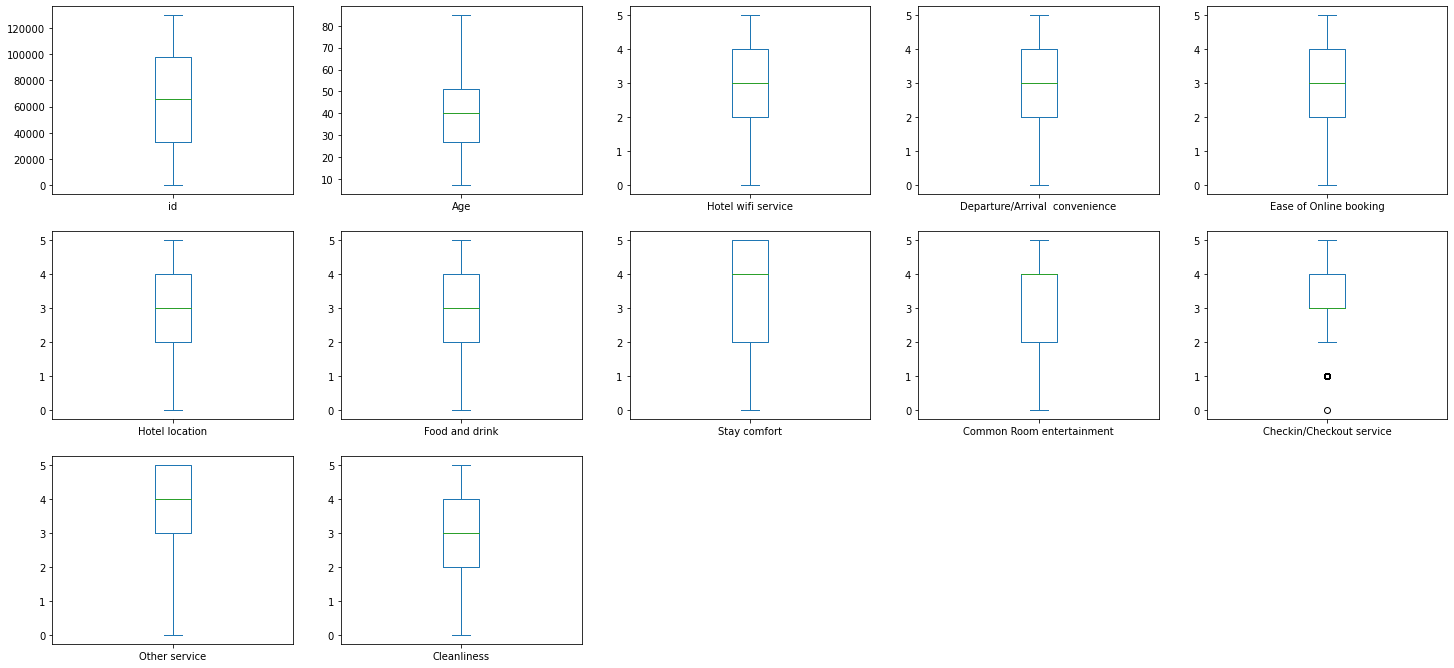

In [23]:
df.plot(kind = 'box', subplots=True, figsize=(25,20), layout = (5,5))
plt.show()

##### *Yukarıdaki grafikte Checkin/Checkout service de aykırı değerler bulunmaktadır.

In [24]:
def remove_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column = column.apply(lambda x: max(lower_bound, min(upper_bound, x)))
    
    return column

df['Checkin/Checkout service'] = remove_outliers(df['Checkin/Checkout service'])


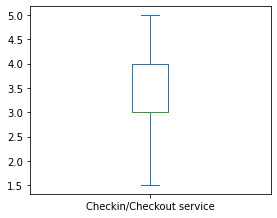

In [25]:
df['Checkin/Checkout service'].plot(kind = 'box', subplots=True, figsize=(25,20), layout = (5,5))
plt.show()

##### *Veride sadece 1 kolonda aykırı değer tespit etmiştik onları göz ardı edebilirdim fakat etmedim öğrenmek güzeldir diyerek :)) Kod u yazarken verdiği destek için Günal'a teşekkürler :)

#### *Hedef etiket veri dağılımı için bar grafiği kullanalım

In [26]:
label_counts = df['satisfaction'].value_counts()

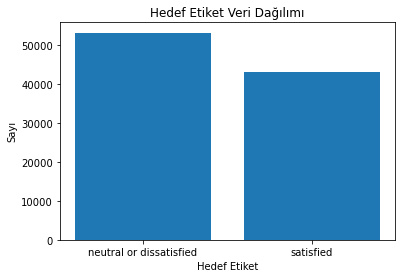

In [27]:
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Hedef Etiket')
plt.ylabel('Sayı')
plt.title('Hedef Etiket Veri Dağılımı')
plt.show()

In [28]:
df.satisfaction.value_counts(normalize=True)

neutral or dissatisfied    0.552111
satisfied                  0.447889
Name: satisfaction, dtype: float64

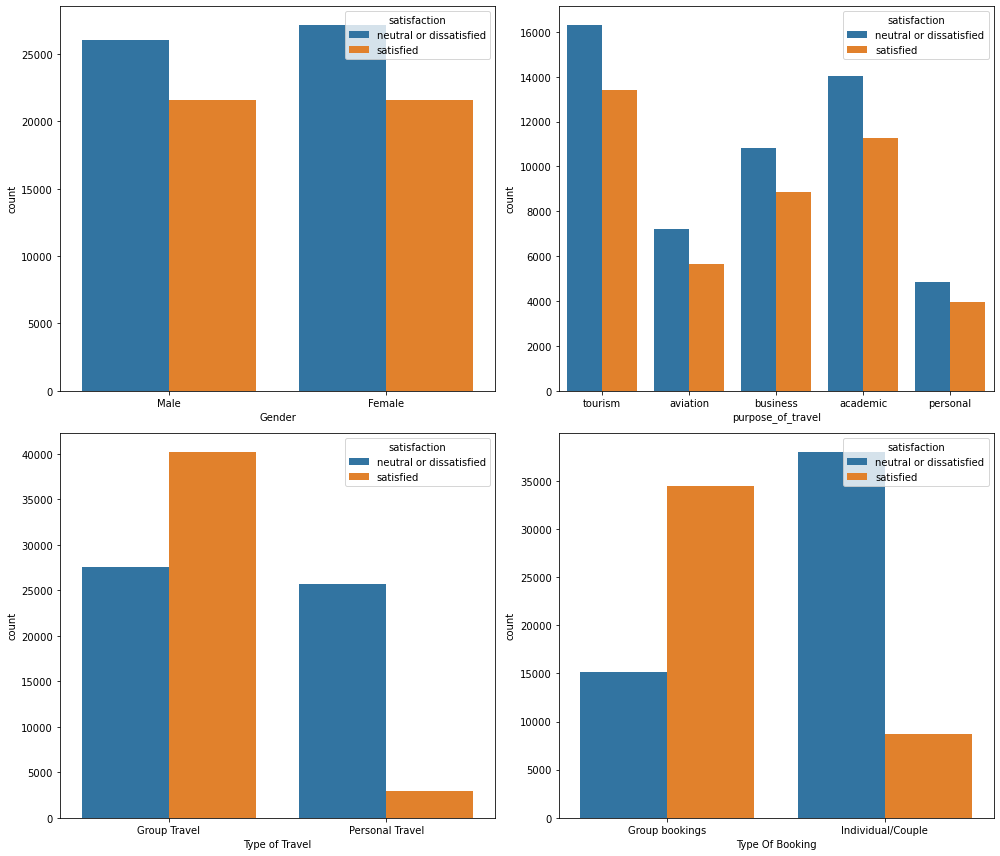

In [29]:
fig, ax = plt.subplots(2,2, figsize=(14, 12))
sns.countplot(data=df, x='Gender', hue='satisfaction', ax=ax[0][0])
sns.countplot(data=df, x='purpose_of_travel', hue='satisfaction', ax=ax[0][1])
sns.countplot(data=df, x='Type of Travel', hue='satisfaction', ax=ax[1][0])
sns.countplot(data=df, x='Type Of Booking', hue='satisfaction', ax=ax[1][1])
plt.tight_layout();

#### *Kategorik veri dağılımını ayrı ayrı görselleştirelim

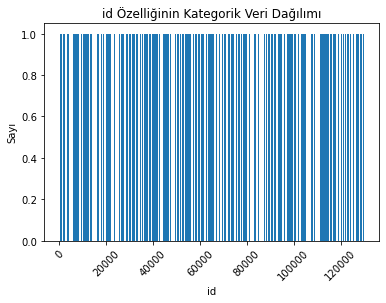

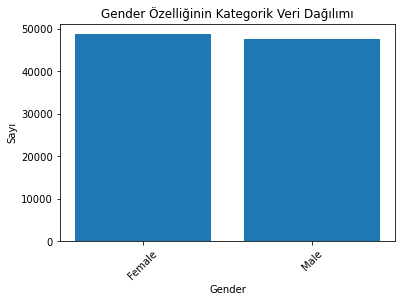

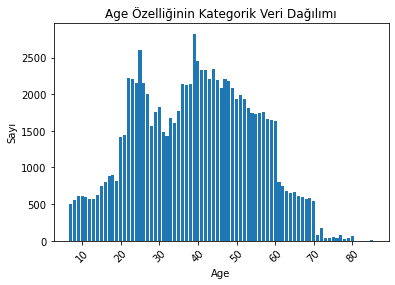

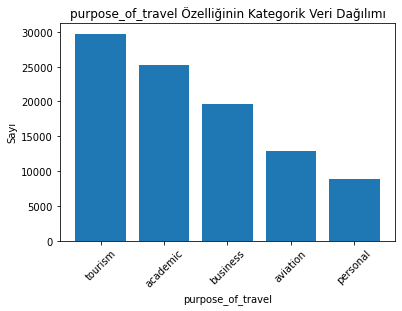

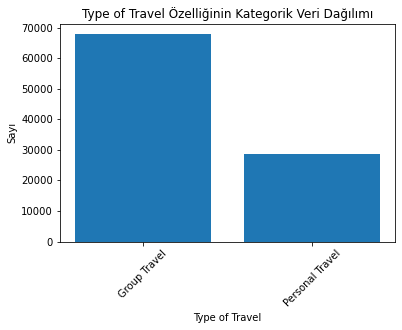

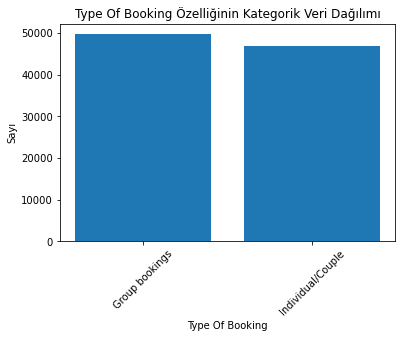

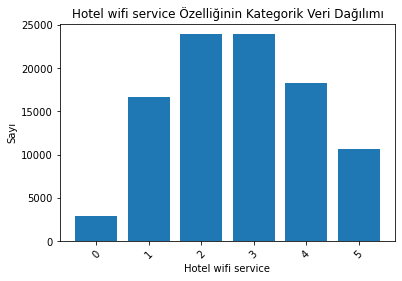

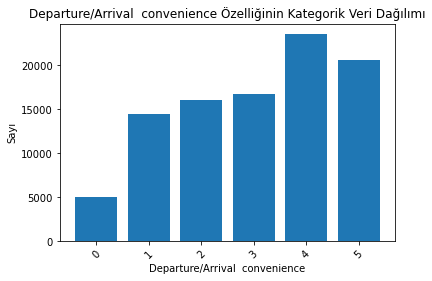

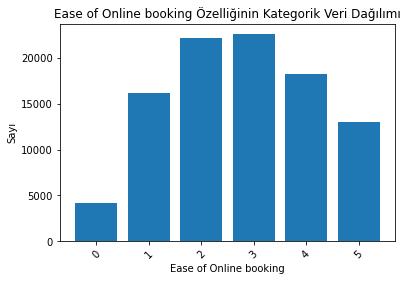

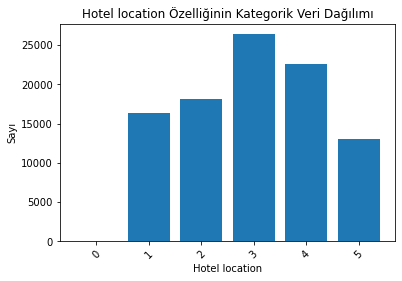

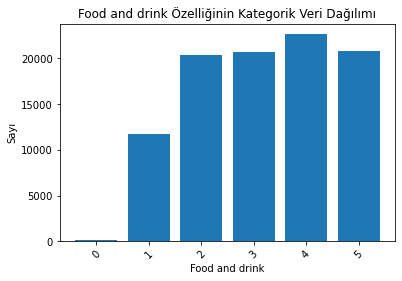

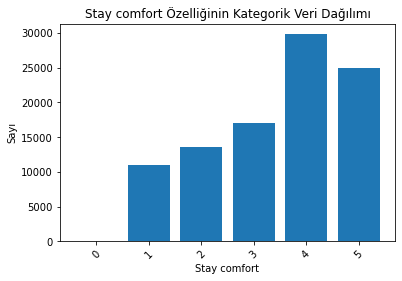

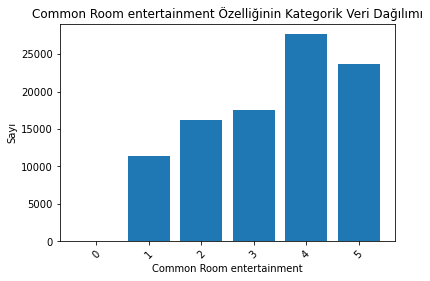

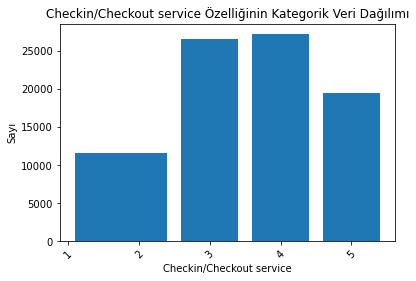

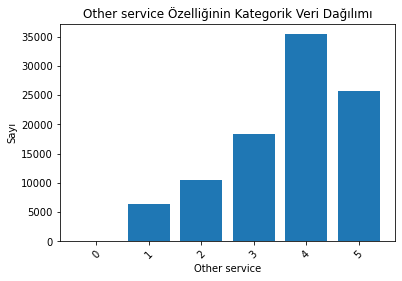

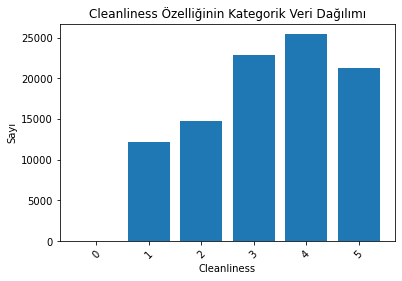

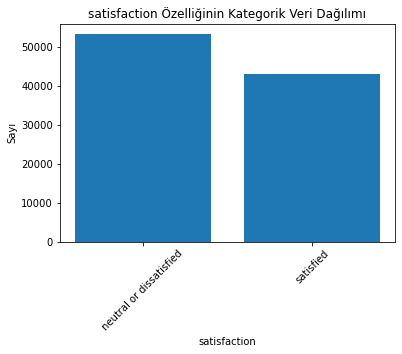

In [30]:
for column in df.columns:
    value_counts = df[column].value_counts()
    plt.bar(value_counts.index, value_counts.values)
    plt.xlabel(column)
    plt.ylabel('Sayı')
    plt.title(f'{column} Özelliğinin Kategorik Veri Dağılımı')
    plt.xticks(rotation=45)
    plt.show()

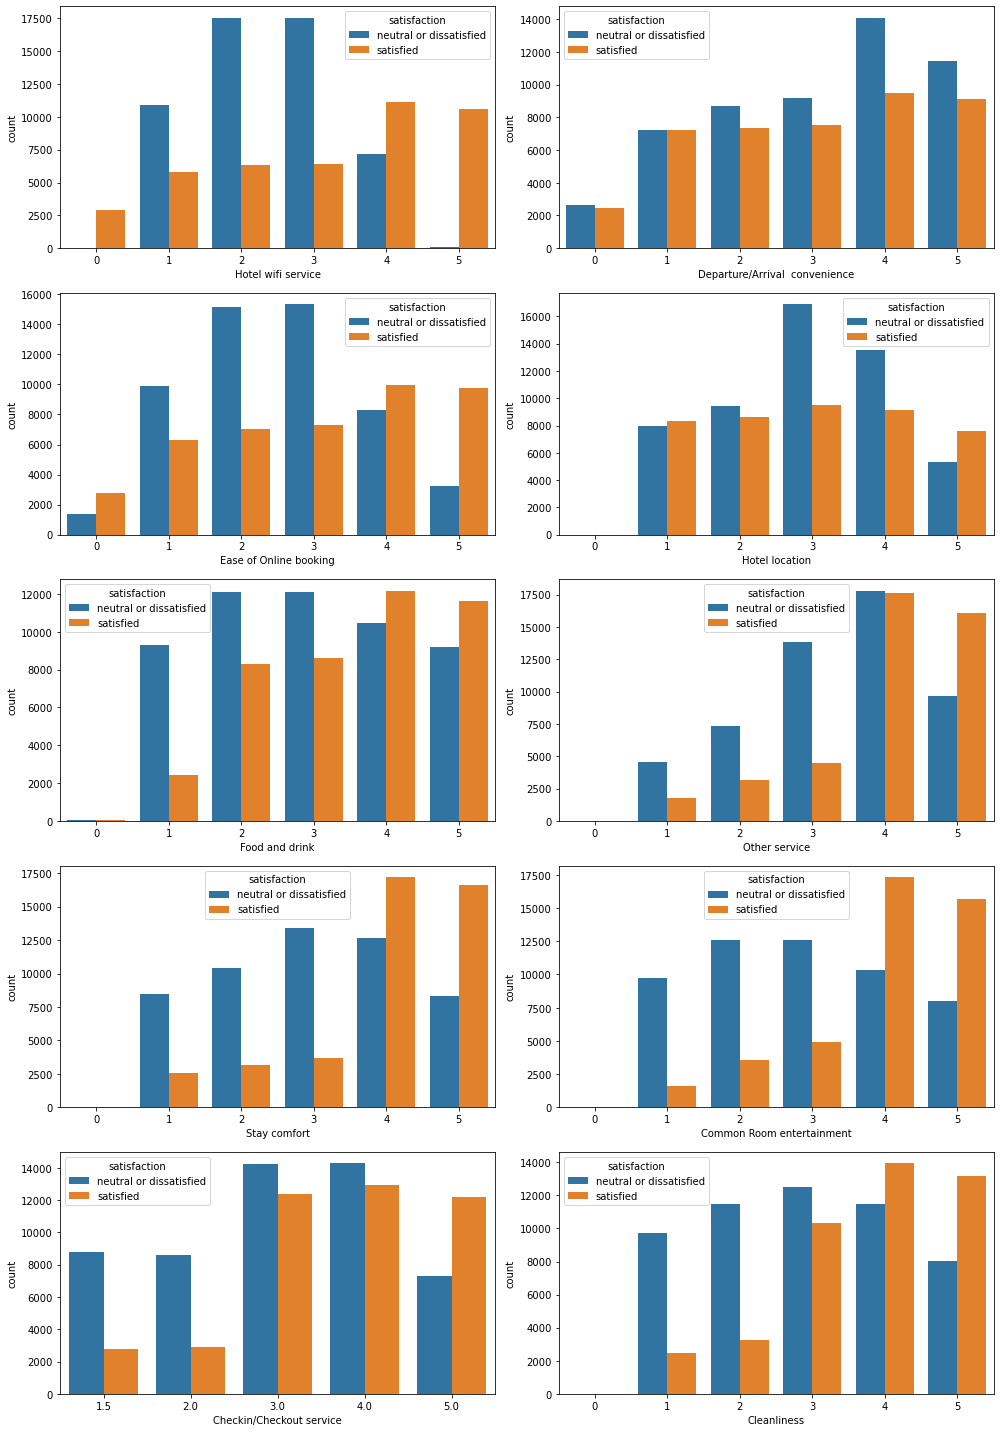

In [31]:
fig, ax = plt.subplots(5,2, figsize=(14, 20))
sns.countplot(data=df, x='Hotel wifi service', hue='satisfaction', ax=ax[0][0])
sns.countplot(data=df, x='Departure/Arrival  convenience', hue='satisfaction', ax=ax[0][1])
sns.countplot(data=df, x='Ease of Online booking', hue='satisfaction', ax=ax[1][0])
sns.countplot(data=df, x='Hotel location', hue='satisfaction', ax=ax[1][1])
sns.countplot(data=df, x='Food and drink', hue='satisfaction', ax=ax[2][0])
sns.countplot(data=df, x='Other service', hue='satisfaction', ax=ax[2][1])
sns.countplot(data=df, x='Stay comfort', hue='satisfaction', ax=ax[3][0])
sns.countplot(data=df, x='Common Room entertainment', hue='satisfaction', ax=ax[3][1])
sns.countplot(data=df, x='Checkin/Checkout service', hue='satisfaction', ax=ax[4][0])
sns.countplot(data=df, x='Cleanliness', hue='satisfaction', ax=ax[4][1])
plt.tight_layout();

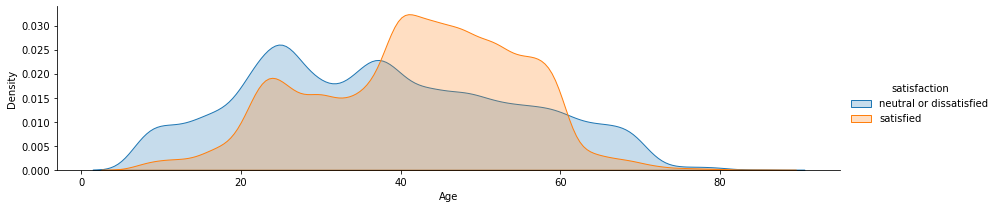

<AxesSubplot:xlabel='Age', ylabel='Count'>

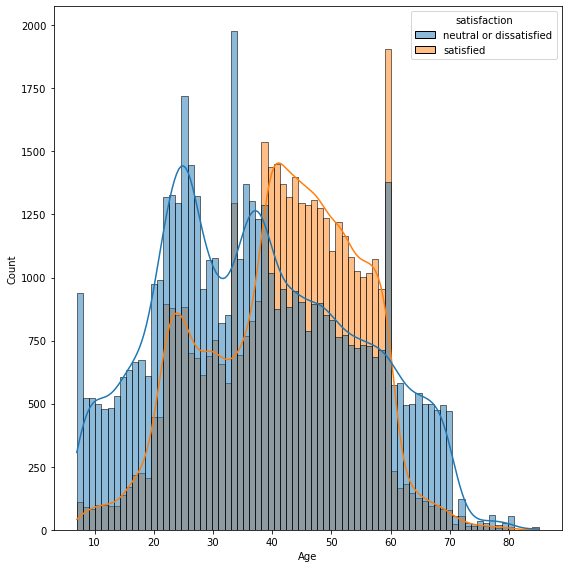

In [32]:
facet = sns.FacetGrid(df, hue = 'satisfaction', aspect = 4)
facet.map(sns.kdeplot, "Age", shade= True)
facet.add_legend()
plt.show()

plt.rcParams["figure.figsize"] = [8,8]
plt.rcParams["figure.autolayout"] = True
sns.histplot(data = df, x = "Age", kde = True, hue = "satisfaction")

###### *en yüksek memnuniyet seviyesi 40-60 yaş aralığında iken 40 yaşın altındaki yaşlarda ortalama memnuniyet seviyesi memnun olmayanlar arasında yer alıyor ve aynı şekilde 60 yaşın üzerindeki kişiler de memnuniyetsizlik hissediyorlar.

In [33]:
def age_group(age):
  if age < 40:
    return "Young"
  elif age > 60:
    return "Old"
  else:
    return "Middle"
  
df['age_group'] = df['Age'].apply(lambda age: age_group(age))

<AxesSubplot:xlabel='age_group', ylabel='count'>

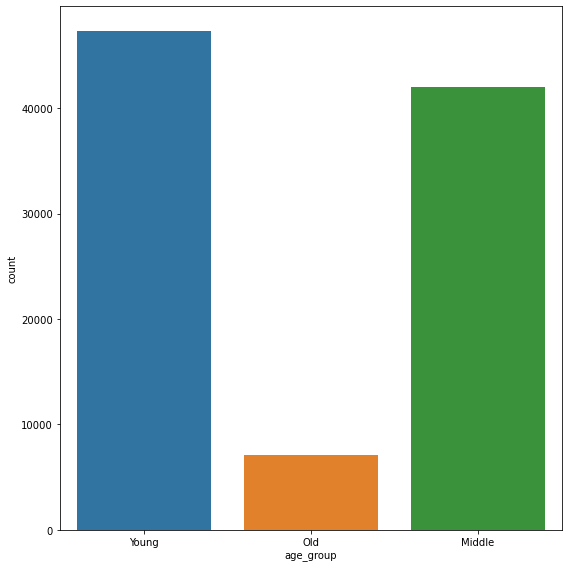

In [34]:
sns.countplot(data=df, x='age_group')

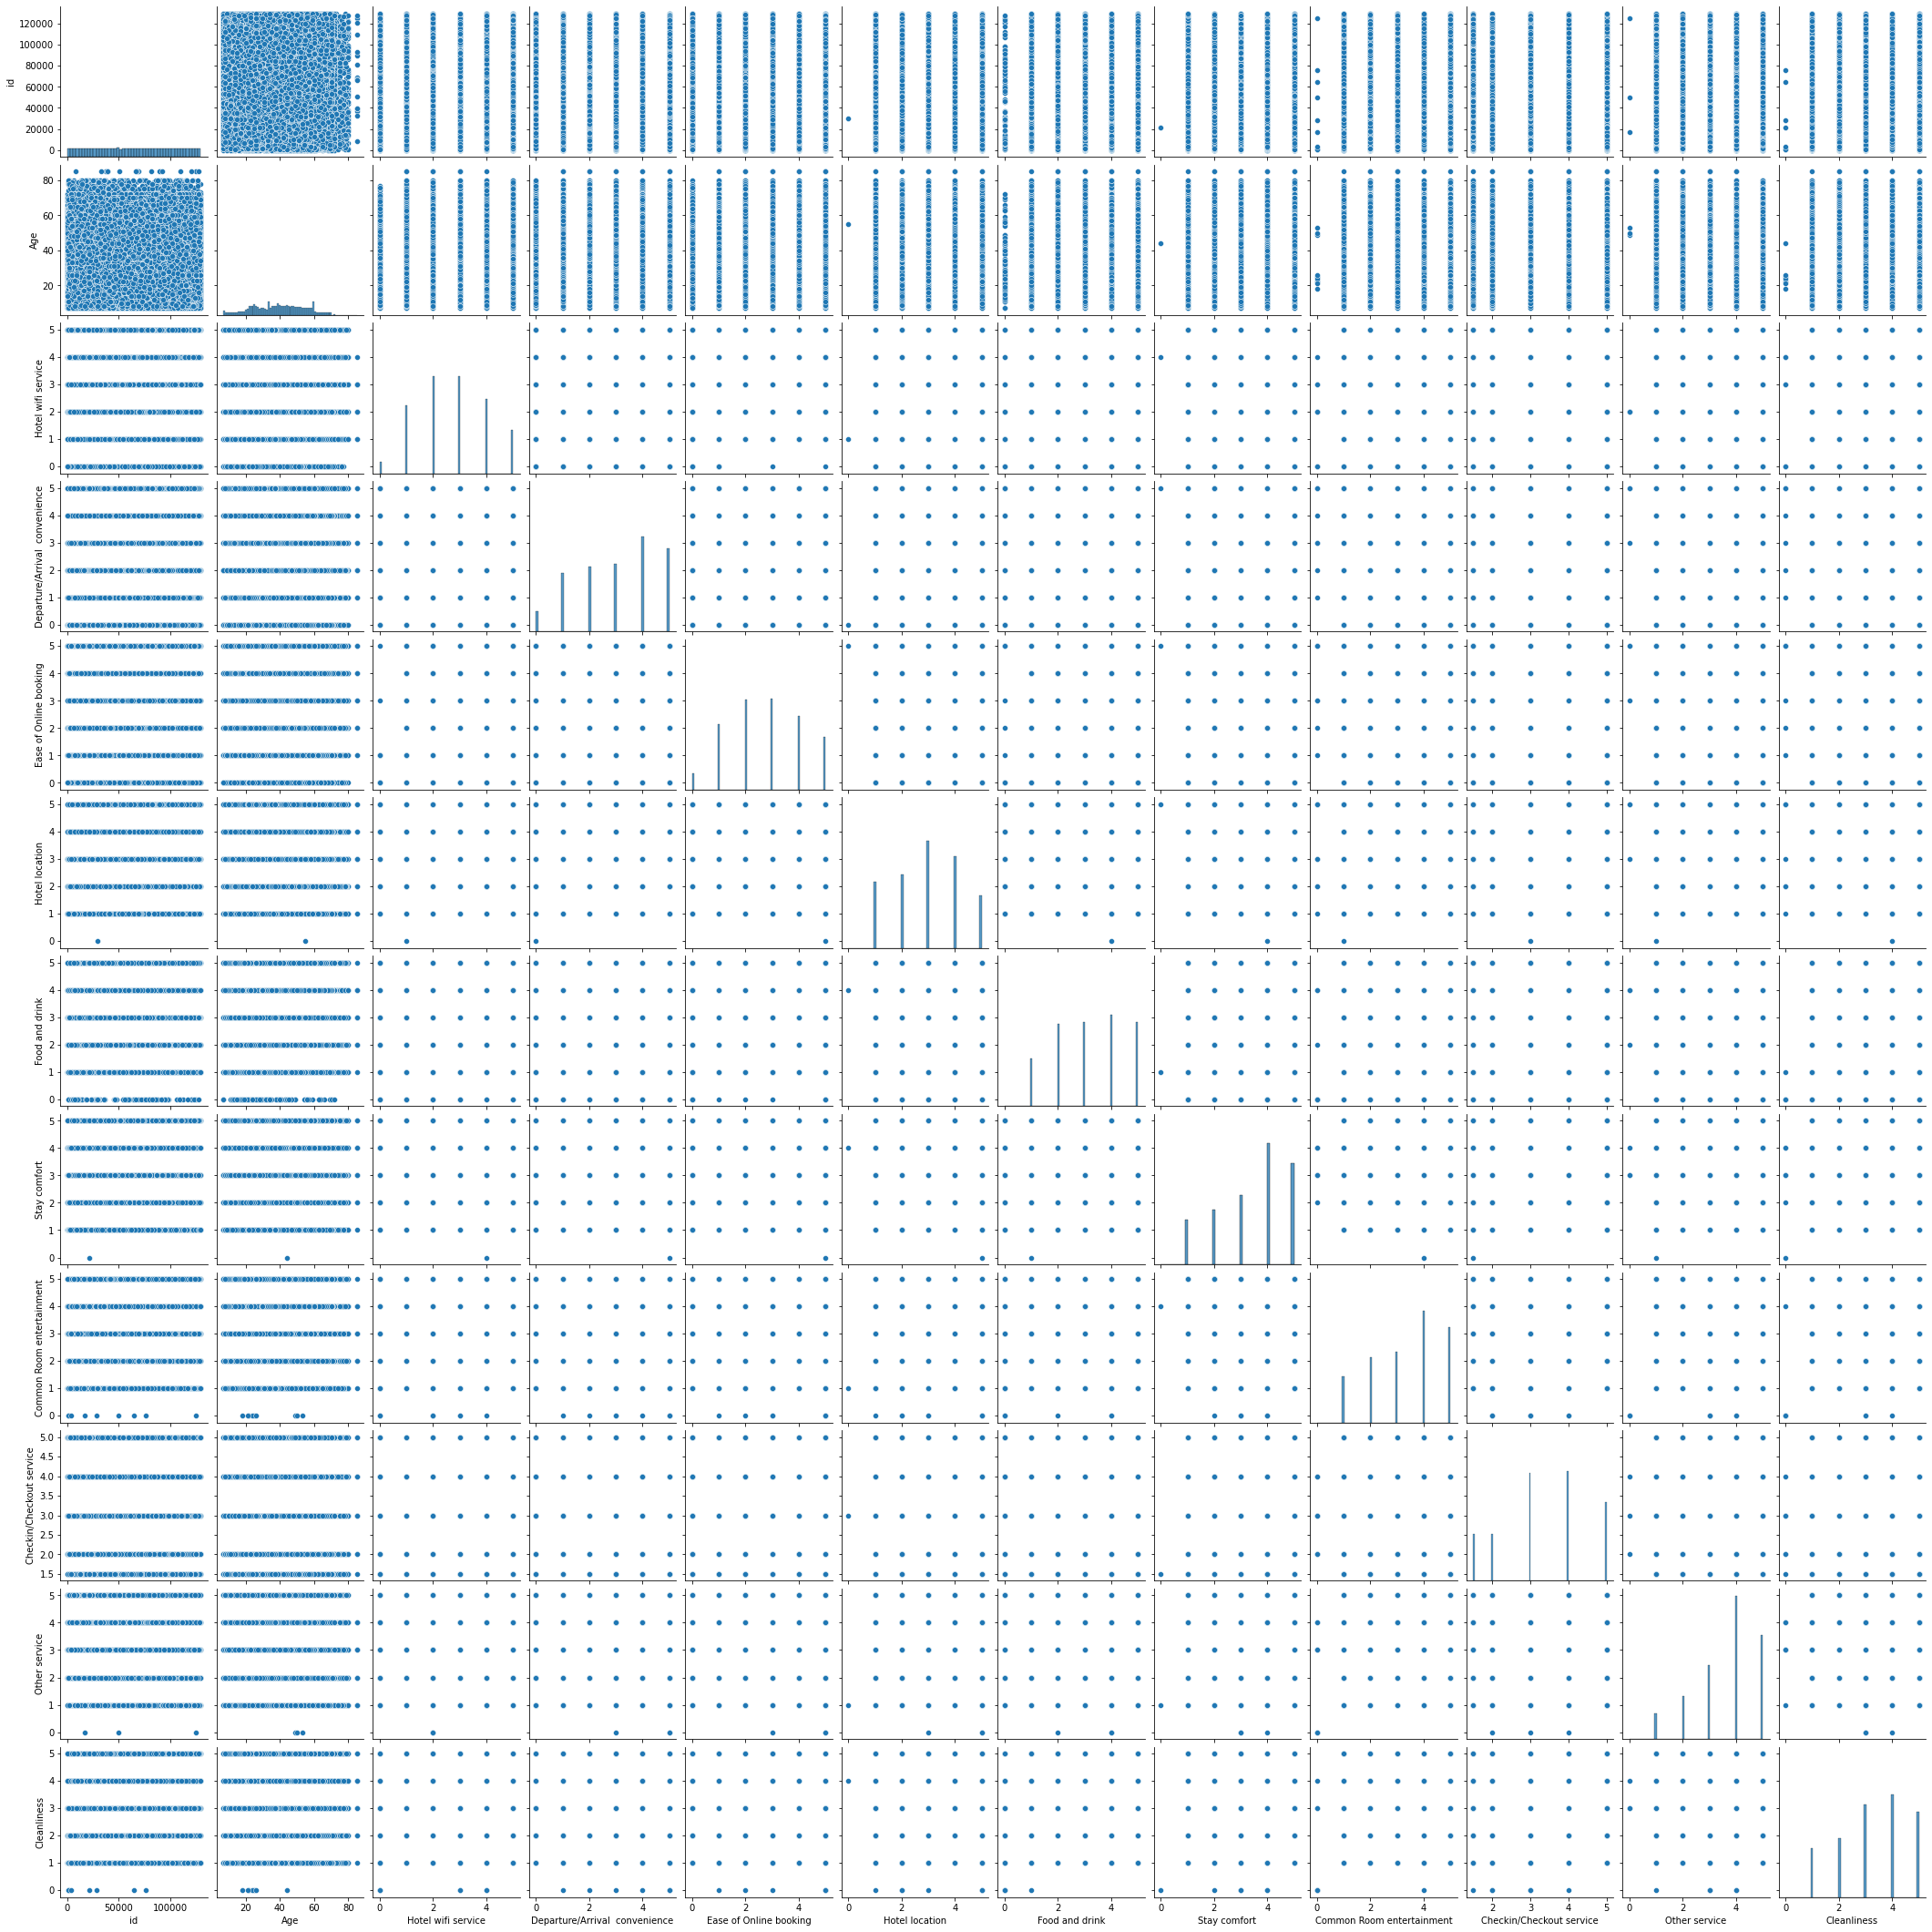

In [46]:
sns.pairplot(df)  
plt.show()

In [65]:
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [66]:
df['satisfaction_int'] = df['satisfaction']

In [67]:
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,satisfaction_int
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied,satisfied


In [74]:
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,satisfaction_int
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied,1
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied,1
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied,5
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied,1
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied,5


In [73]:
df['satisfaction_int'].replace({'satisfied': 5, 'neutral or dissatisfied': 1}, inplace=True)

In [98]:
korelasyon_1 = df.corr()

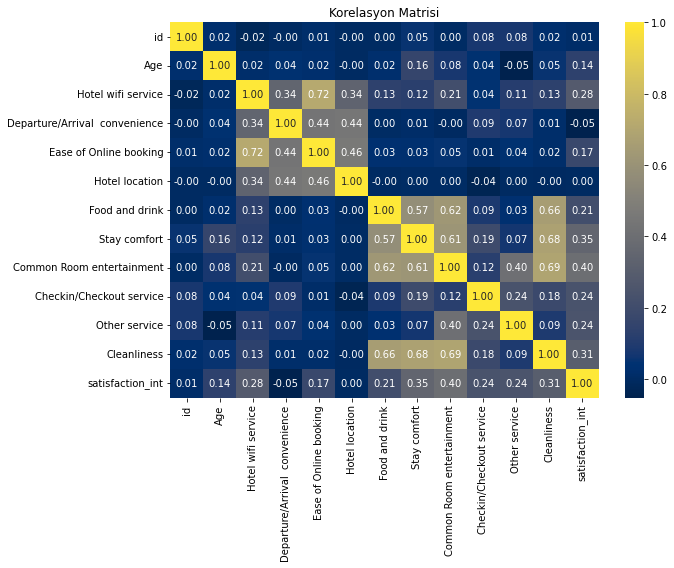

In [99]:
plt.figure(figsize=(10, 8))
sns.heatmap(korelasyon_1, annot=True, cmap="cividis", fmt=".2f")   #cividis renk körü insanlar için tasarlanmış böyle şeyleri severiz :)
plt.title('Korelasyon Matrisi') 
plt.show()

In [92]:
korelasyon_group_travel = df[df['Type of Travel'] == "Group Travel"].corr()

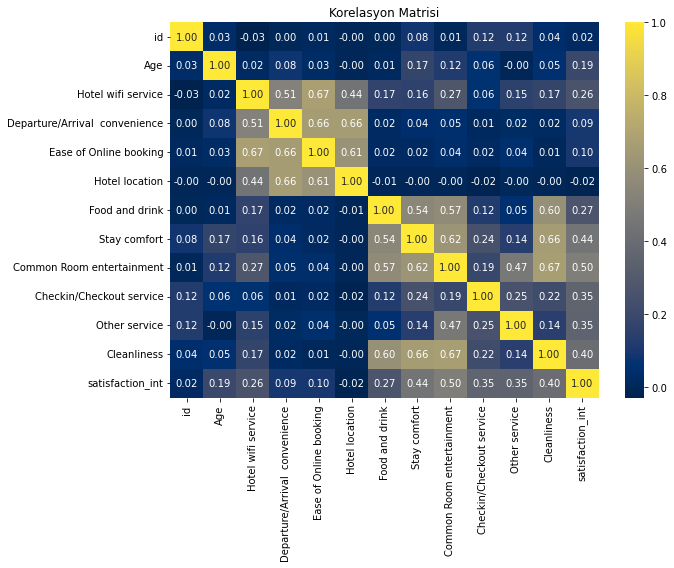

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(korelasyon_group_travel, annot=True, cmap="cividis", fmt=".2f")   #cividis renk körü insanlar için tasarlanmış böyle şeyleri severiz :)
plt.title('Korelasyon Matrisi') 
plt.show()